# <font color="Lime"><b>Superstore Sales Data Analysis</b></font>
**Author:** <font color="Orange"><b>Muhammad Faheem</b></font>

**Objectives:** <font color="Orange"><b>
1. Identify the top-selling products based on total sales

2. Determine the best-performing region by total sales

3. Analyze the top cities contributing to sales

4. Detect loss-making products (products with overall negative profit)

5. Analyze monthly and yearly sales trends to identify seasonality

6. Find the most profitable products (highest total profit)

7. Highlight products consistently generating losses </b>

<font color="yellow"><b>Importing Libraries</b></font>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<font color="yellow"><b>checking data encoded format</b></font>

In [22]:
import chardet

with open("/content/drive/MyDrive/Datasets/Sample - Superstore.csv", 'rb') as f:
    result = chardet.detect(f.read(10000))
    print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


<font color="yellow"><b>Loading Data</b></font>

In [23]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/Sample - Superstore.csv", encoding=result['encoding'])

In [24]:
Processed_data=data

<font color="yellow"><b>Understanding Data</b></font>

In [25]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [27]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


<font color="yellow"><b>Getting column names</b></font>

In [28]:
aa=data.columns
print(aa)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


<font color="yellow"><b>Checking for Null values</b></font>

<font color="yellow"><b>looking for Null values in whole dataset</b></font>

In [29]:
data.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


<font color="yellow"><b>cheking if null values exists at all

In [30]:
data.isnull().values.any()

np.False_

<font color="yellow"><b>looking for null valus in each row

In [31]:
data[data.isnull().any(axis=1)]


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


<font color="yellow"><b>Checking Duplicate Data</b></font>

In [32]:
data.duplicated().sum()

np.int64(0)

In [33]:
data['Discount'].describe()

,Discount
count,9994.000000
mean,0.156203
std,0.206452
min,0.000000
25%,0.000000
50%,0.200000
75%,0.200000
max,0.800000


In [34]:
data['Profit'].describe()

,Profit
count,9994.000000
mean,28.656896
std,234.260108
min,-6599.978000
25%,1.728750
50%,8.666500
75%,29.364000
max,8399.976000


<font color="yellow"><b>In how many countries they sell their products</b></font>

In [35]:
data['Country'].value_counts().shape[0]

1

<font color="yellow"><b>In how many regions they sell their products</b></font>

In [36]:
data['Region'].value_counts().shape[0]

4

<font color="yellow"><b>In how many cities they sell their product</b></font>

In [37]:
data['City'].value_counts().shape[0]

531

<font color="yellow"><b>How many products they sell</b></font>

In [38]:
data['Product Name'].value_counts().shape[0]

1850

<font color="yellow"><b>How many customer segments they have</b></font>

In [39]:
data['Segment'].value_counts().shape[0]

3

<font color="yellow"><b>How many categories of products they sell</b></font>

In [40]:
data['Category'].value_counts()

,count
Category,
Office Supplies,6026
Furniture,2121
Technology,1847


<font color="yellow"><b>Converting date to standard type of it's not</b></font>

In [41]:
Processed_data['Order Date'] = pd.to_datetime(Processed_data['Order Date'], format="%m/%d/%Y")
Processed_data['Ship Date'] = pd.to_datetime(Processed_data['Ship Date'], format="%m/%d/%Y")

In [42]:
Processed_data['Order Date'].head()

,Order Date
0,2016-11-08
1,2016-11-08
2,2016-06-12
3,2015-10-11
4,2015-10-11


<font color="yellow"><b>Extracting Month and Year from 'Order date'</b></font>

In [43]:
Processed_data['Month'] = data['Order Date'].dt.month

In [44]:
Processed_data['Month'].head()

,Month
0,11
1,11
2,6
3,10
4,10


In [45]:
Processed_data['Month Name'] = data['Order Date'].dt.strftime('%B')

In [46]:
Processed_data['Year'] = data['Order Date'].dt.year

In [47]:
Processed_data[['Month Name','Year']].head()

,Month Name,Year
0,November,2016
1,November,2016
2,June,2016
3,October,2015
4,October,2015


<font color="yellow"><b>Converting Discount into Discount%</b></font>

In [48]:
Processed_data['Discount']=data['Discount']*100

**Average Discount**

In [49]:
Processed_data['Discount'].mean()

np.float64(15.62027216329798)

In [50]:
Processed_data['Discount'].describe()

,Discount
count,9994.000000
mean,15.620272
std,20.645197
min,0.000000
25%,0.000000
50%,20.000000
75%,20.000000
max,80.000000


<font color="yellow"><b>Grouping Data</b></font>

<font color="yellow"><b>Total Sales per Category</b></font>

In [51]:
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()
sales_by_category

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


<font color="yellow"><b>Sales description by Category</b></font>

In [52]:
sales_by_category = data.groupby('Category')['Sales'].describe()
sales_by_category

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Furniture,2121.0,349.834887,503.179145,1.892,47.040,182.220,435.168,4416.174
Office Supplies,6026.0,119.324101,382.182228,0.444,11.760,27.418,79.920,9892.740
Technology,1847.0,452.709276,1108.655848,0.990,68.016,166.160,448.534,22638.480


<font color="yellow"><b>Average profit per product</b></font>

In [53]:
average_profit_per_product = data.groupby('Sub-Category')['Profit'].mean().reset_index()
average_profit_per_product

,Sub-Category,Profit
0,Accessories,54.111788
1,Appliances,38.922758
2,Art,8.200737
3,Binders,19.843574
4,Bookcases,-15.230509
5,Chairs,43.095894
6,Copiers,817.909190
7,Envelopes,27.418019
8,Fasteners,4.375660
9,Furnishings,13.645918


<font color="yellow"><b>profit per product description</b></font>

In [54]:
data.groupby('Sub-Category')['Profit'].describe()

,count,mean,std,min,25%,50%,75%,max
Sub-Category,,,,,,,,
Accessories,775.0,54.111788,106.155455,-75.5958,5.771500,21.00000,57.355200,829.3754
Appliances,466.0,38.922758,148.319146,-1181.2824,4.061200,17.44650,56.113650,793.7160
Art,796.0,8.200737,13.384264,0.1533,1.684800,3.72360,8.677175,112.5740
Binders,1523.0,19.843574,306.196773,-3701.8928,-6.026850,3.97710,15.832700,4946.3700
Bookcases,228.0,-15.230509,182.034224,-1665.0522,-42.631200,4.13330,40.054100,1013.1270
Chairs,617.0,43.095894,127.099922,-630.8820,-14.478400,13.31760,70.196000,770.3520
Copiers,68.0,817.909190,1460.921156,59.9980,164.245725,332.99420,848.736375,8399.9760
Envelopes,254.0,27.418019,35.354983,0.5508,5.906700,12.71835,32.539950,204.0714
Fasteners,217.0,4.375660,5.055053,-11.8256,0.868800,2.84160,6.229200,21.8880


<font color="yellow"><b>Mothly Sales trends</b></font>

In [55]:
monthly_sales = data.groupby(['Year', 'Month Name'])['Sales'].sum().reset_index()
monthly_sales

,Year,Month Name,Sales
0,2014,April,28295.3450
1,2014,August,27909.4685
2,2014,December,69545.6205
3,2014,February,4519.8920
4,2014,January,14236.8950
5,2014,July,33946.3930
6,2014,June,34595.1276
7,2014,March,55691.0090
8,2014,May,23648.2870
9,2014,November,78628.7167


<font color="yellow"><b>Yearly Sales by Region</b></font>

In [56]:
yearly_sales_by_region = data.groupby(['Year', 'Region'])['Sales'].sum().reset_index()
yearly_sales_by_region

,Year,Region,Sales
0,2014,Central,103838.1646
1,2014,East,128680.4570
2,2014,South,103845.8435
3,2014,West,147883.0330
4,2015,Central,102874.2220
5,2015,East,156332.0570
6,2015,South,71359.9805
7,2015,West,139966.2495
8,2016,Central,147429.3760
9,2016,East,180685.8220


<font color="yellow"><b>Yearly Sales trends</b></font>

In [57]:
yearly_sales = data.groupby(['Year'])['Sales'].sum().reset_index()
yearly_sales

,Year,Sales
0,2014,484247.4981
1,2015,470532.5090
2,2016,609205.5980
3,2017,733215.2552


<font color="yellow"><b>Sorting and Filtering Data</b></font>

<font color="yellow"><b>Sorting sales by highest first</b></font>

In [58]:
sorted_sales = Processed_data.sort_values(by='Sales', ascending=False)
sorted_sales

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Month Name,Year
2697,2698,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,50.0,-1811.0784,3,March,2014
6826,6827,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760,10,October,2016
8153,8154,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,3,March,2017
2623,2624,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,20.0,3919.9888,10,October,2017
4190,4191,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,11,November,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2107,US-2014-152723,2014-09-26,2014-09-26,Same Day,HG-14965,Henry Goldwyn,Corporate,United States,Mesquite,...,Office Supplies,Binders,Acco 3-Hole Punch,0.876,1,80.0,-1.4016,9,September,2014
4711,4712,CA-2014-112403,2014-03-31,2014-03-31,Same Day,JO-15280,Jas O'Carroll,Consumer,United States,Philadelphia,...,Office Supplies,Binders,Avery Round Ring Poly Binders,0.852,1,70.0,-0.5964,3,March,2014
8658,8659,CA-2016-168361,2016-06-21,2016-06-25,Standard Class,KB-16600,Ken Brennan,Corporate,United States,Chicago,...,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,0.836,1,80.0,-1.3376,6,June,2016
9292,9293,CA-2017-124114,2017-03-02,2017-03-02,Same Day,RS-19765,Roland Schwarz,Corporate,United States,Waco,...,Office Supplies,Binders,Acco Suede Grain Vinyl Round Ring Binder,0.556,1,80.0,-0.9452,3,March,2017


<font color="yellow"><b>Filetering top 10 products by sales</b></font>

In [59]:
top_products = Processed_data.groupby('Product Name')['Sales'].sum().nlargest(10).reset_index()
top_products

,Product Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,61599.824
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480
3,HON 5400 Series Task Chairs for Big and Tall,21870.576
4,GBC DocuBind TL300 Electric Binding System,19823.479
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
6,Hewlett Packard LaserJet 3310 Copier,18839.686
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
8,GBC DocuBind P400 Electric Binding System,17965.068
9,High Speed Automatic Electric Letter Opener,17030.312


<font color="yellow"><b>Checking correlation</b></font>

In [60]:
correlation_matrix=Processed_data[['Sales', 'Profit', 'Discount', 'Quantity']].corr()
correlation_matrix

,Sales,Profit,Discount,Quantity
Sales,1.000000,0.479064,-0.028190,0.200795
Profit,0.479064,1.000000,-0.219487,0.066253
Discount,-0.028190,-0.219487,1.000000,0.008623
Quantity,0.200795,0.066253,0.008623,1.000000


<font color="yellow"><b>Visulazing correlation</b></font>

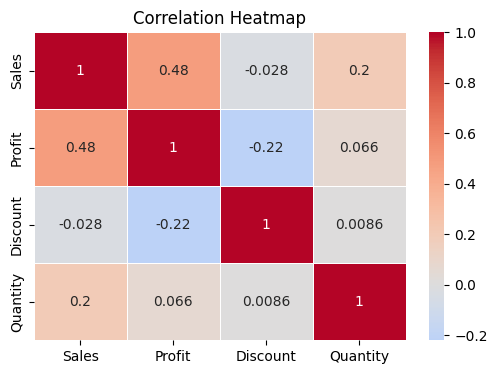

In [61]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<font color="yellow"><b>Customer Segements Summary</b></font>

In [62]:
Processed_data.groupby('Region')['Sales'].sum()

,Sales
Region,
Central,501239.8908
East,678781.2400
South,391721.9050
West,725457.8245


<font color="yellow"><b>Customer region summary</b></font>

In [63]:
Processed_data.groupby('Segment')['Profit'].mean()

,Profit
Segment,
Consumer,25.836873
Corporate,30.456667
Home Office,33.818664


<font color="yellow"><b>Data Visulatization</b></font>

<font color="yellow"><b>Monthly Sales</b></font>

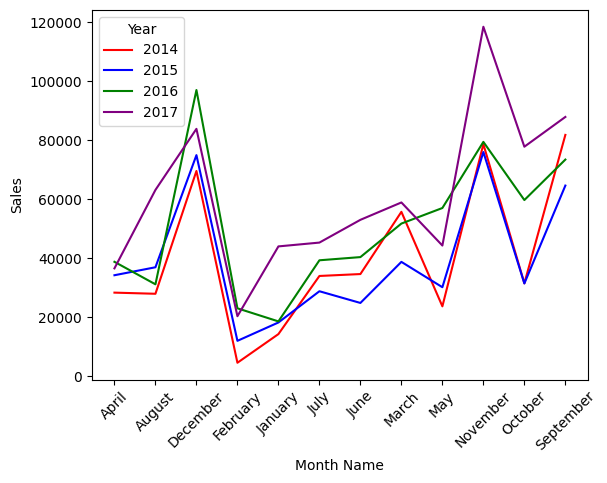

In [64]:
custom_palette = {
    2014: 'red',
    2015: 'blue',
    2016: 'green',
    2017: 'purple'
}
sns.lineplot(data=monthly_sales, x='Month Name', y='Sales', hue='Year' , palette=custom_palette)
plt.xticks(rotation=45)
plt.show()


<font color="yellow"><b>Yearly sales in each region</b></font>

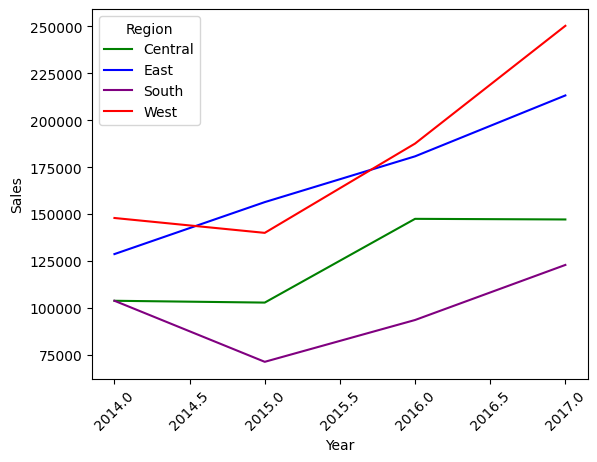

In [65]:
custom_palette = {
    'West': 'red',
    'East': 'blue',
    'Central': 'green',
    'South': 'purple'
}
sns.lineplot(data=yearly_sales_by_region, x='Year', y='Sales', hue='Region' , palette=custom_palette)
plt.xticks(rotation=45)
plt.show()

<font color="yellow"><b>Finding Key insights</b></font>

<font color="yellow"><b>Top performing category</b></font>

In [66]:
top_category=data.groupby('Category')['Profit'].sum().sort_values(ascending=False)
top_category=pd.DataFrame(top_category)
top_category

,Profit
Category,
Technology,145454.9481
Office Supplies,122490.8008
Furniture,18451.2728


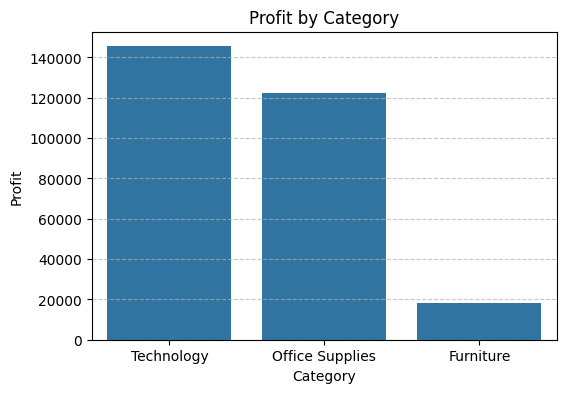

In [67]:
plt.figure(figsize=(6, 4))
sns.barplot(data=top_category, x='Category', y='Profit')

plt.title('Profit by Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<font color="yellow"><b>Top performing Sub category</b></font>

In [68]:
data.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)

,Profit
Sub-Category,
Copiers,55617.8249
Phones,44515.7306
Accessories,41936.6357
Paper,34053.5693
Binders,30221.7633
Chairs,26590.1663
Storage,21278.8264
Appliances,18138.0054
Furnishings,13059.1436


<font color="yellow"><b>Top Selling Region</b></font>

In [69]:
top_region=pd.DataFrame(data.groupby('Region')['Sales'].sum().sort_values(ascending=False))
top_region

,Sales
Region,
West,725457.8245
East,678781.2400
Central,501239.8908
South,391721.9050


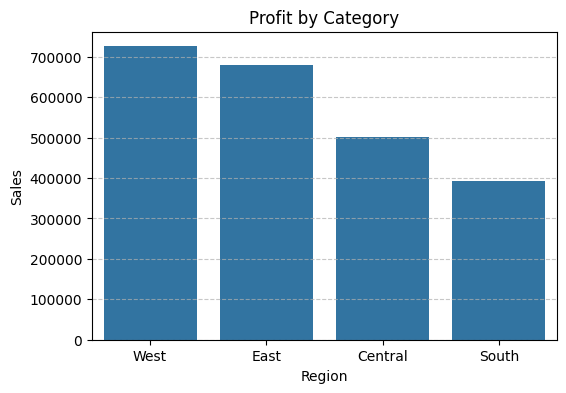

In [70]:
plt.figure(figsize=(6, 4))
sns.barplot(data=top_region, x='Region', y='Sales')
plt.title('Profit by Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<font color="yellow"><b>Top Selling Cities</b></font>

In [71]:
data.groupby('City')['Sales'].sum().sort_values(ascending=False).head(15)

,Sales
City,
New York City,256368.1610
Los Angeles,175851.3410
Seattle,119540.7420
San Francisco,112669.0920
Philadelphia,109077.0130
Houston,64504.7604
Chicago,48539.5410
San Diego,47521.0290
Jacksonville,44713.1830


<font color="yellow"><b>Loss making products</b></font>

In [72]:
Processed_data[Processed_data['Profit'] < 0].groupby('Product Name')['Profit'].sum().sort_values().head(15)

,Profit
Product Name,
Cubify CubeX 3D Printer Double Head Print,-9239.9692
GBC DocuBind P400 Electric Binding System,-6859.3896
Lexmark MX611dhe Monochrome Laser Printer,-5269.9690
GBC Ibimaster 500 Manual ProClick Binding System,-5098.5660
GBC DocuBind TL300 Electric Binding System,-4162.0336
Cubify CubeX 3D Printer Triple Head Print,-3839.9904
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,-3431.6730
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,-3107.5272
Ibico EPK-21 Electric Binding System,-2929.4845


<font color="yellow"><b>Saving Processed Data</b></font>

In [73]:
Processed_data.to_csv('processed_sales_data.csv', index=False)